In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from pathlib import Path
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# tensorflow
import tensorflow as tf

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, classification_report

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

2024-03-23 12:37:58.548025: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#See what is in the first dataset containing red wines
df_red = pd.read_csv("wine_quality.csv")
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#See what is in the second dataset containg white wines
df_white = pd.read_csv("winequality-white.csv")
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
#Clean up white wine data to be in the same format as dataset one
df_white = pd.read_csv("winequality-white.csv",sep=";",header=0)
df_white.columns=[x.replace(" ","_") for x in df_white.columns]
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#Added wine type column in first dataset to label all of these wines red
df_red["wine_type"]="red"
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
#Added wine type column in second dataset to label all of these wines white
df_white["wine_type"]="white"
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
#Combining the first and second dataset of red and white wines
pd.concat([df_red, df_white], ignore_index=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [8]:
#Name new combined data frame
df_combined = pd.concat([df_red, df_white], ignore_index=True)

In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
#Do we need to scale based on the range?
df_combined.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
#Creating a copy of data for processing
df_combined2 = df_combined.copy()
df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [14]:
df_combined2.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [15]:
#One-Hot Encoding
df_combined2["wine_type"] = np.where(df_combined2["wine_type"]=="red", 1, 0)
df_combined2.head()

#df_combined2["wine_type"] = df_combined2.wine_type.astype(str)
##df_combined2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
df_combined2.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [18]:
corrs = df_combined2.corr()
corrs

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


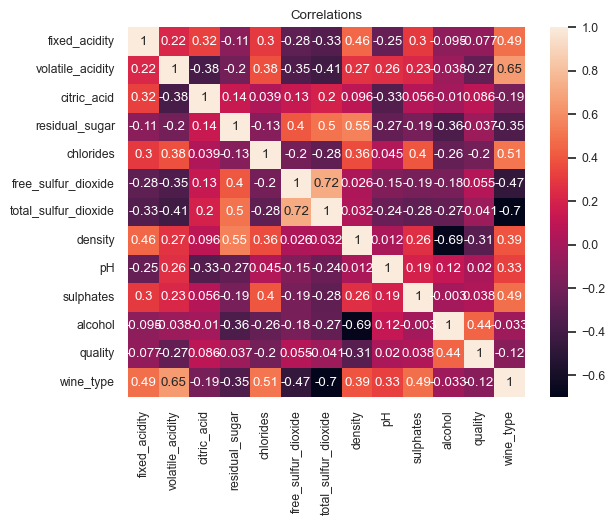

In [21]:
sns.heatmap(corrs, annot=True)
sns.set(font_scale=0.8)
plt.title("Correlations")
plt.show()

In [22]:
# features
X = df_combined2.drop(["wine_type", "quality"], axis=1) # keep ALL features except for the target

# target
y = df_combined2.wine_type

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

print(X_train.shape)
print(X_test.shape)


(4872, 11)
(1625, 11)


In [23]:
# Non-resampled data
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
predictions = lr.predict(X_test)
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.97      0.96      0.97       400

    accuracy                           0.99      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.99      0.99      0.99      1625



In [24]:
#Need to balance out the data to avoid skewed analysis
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (7346, 11)
After OverSampling, the shape of train_y: (7346,) 

After OverSampling, counts of label '1': 3673
After OverSampling, counts of label '0': 3673


In [26]:
# Resampled data
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train_res, y_train_res) 
  
predictions = lr.predict(X_test)
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1225
           1       0.95      0.99      0.97       400

    accuracy                           0.98      1625
   macro avg       0.97      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [27]:
#Trying with NearMiss
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 1199
Before Undersampling, counts of label '0': 3673 

After Undersampling, the shape of train_X: (2398, 11)
After Undersampling, the shape of train_y: (2398,) 

After Undersampling, counts of label '1': 1199
After Undersampling, counts of label '0': 1199


In [28]:
# Resampled data
# train the model on training set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1225
           1       0.97      0.97      0.97       400

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [29]:
# Compile, Train, and Evaluate model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn1 = tf.keras.models.Sequential()

# Added first Dense layer
nn1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Added second layer
nn1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Added output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of the Sequential model
nn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compiled Sequential model and customized metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn1.fit(X_train, y_train, epochs=20)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.3791 - loss: 1.4176
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7515 - loss: 0.3974
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8551 - loss: 0.3143
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9202 - loss: 0.2317
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9291 - loss: 0.1999
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9336 - loss: 0.1925
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9342 - loss: 0.1856
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9326 - loss: 0.1846
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9383 - loss: 0.1751
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9322 - loss: 0.1902
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9365 - loss: 0.1782
Epoch 12/20
153/153 ━━━━━━━━━━━━

In [31]:
# Evaluate the model using test data
model_loss, model_accuracy = nn1.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - 3ms/step - accuracy: 0.9606 - loss: 0.1291
Loss: 0.1291036456823349, Accuracy: 0.9606153964996338


In [32]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
TRAINING METRICS

    Train Confusion Matrix:
    [[3605   68]
 [ 185 1014]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.95      0.98      0.97      3673
           1       0.94      0.85      0.89      1199

    accuracy                           0.95      4872
   macro avg       0.94      0.91      0.93      4872
weighted avg       0.95      0.95      0.95      4872

    



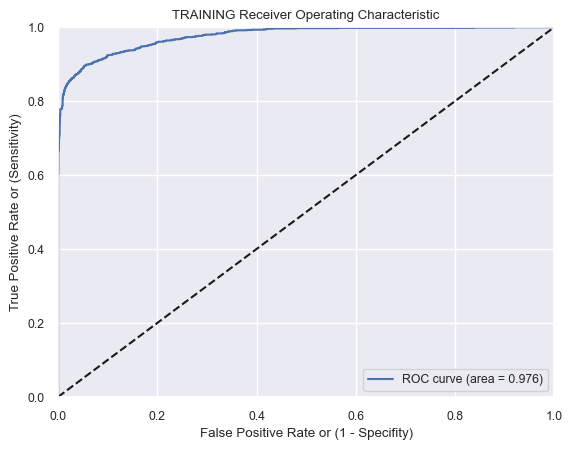



TESTING METRICS

    Test Confusion Matrix:
    [[1209   16]
 [  48  352]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.96      0.99      0.97      1225
           1       0.96      0.88      0.92       400

    accuracy                           0.96      1625
   macro avg       0.96      0.93      0.95      1625
weighted avg       0.96      0.96      0.96      1625

    



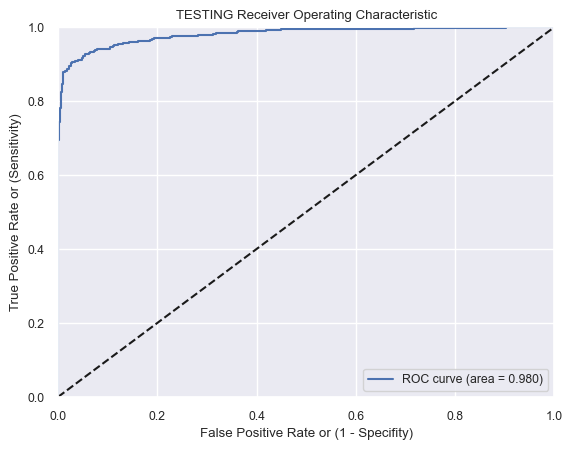

In [33]:
doClassification_NN(nn1, X_train, X_test, y_train, y_test)

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn2 = tf.keras.models.Sequential()

# Add first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Second layer
nn2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Third layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the Sequential model
nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338 (1.32 KB)

 Trainable params: 338 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile Sequential model and customized metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model to training data
fit_model = nn2.fit(X_train, y_train, epochs=20)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.8442 - loss: 0.4265
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9179 - loss: 0.2421
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9215 - loss: 0.2124
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9316 - loss: 0.1980
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.9232 - loss: 0.2112
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.9293 - loss: 0.1949
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9277 - loss: 0.1937
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9285 - loss: 0.1916
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9346 - loss: 0.1896
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9412 - loss: 0.1623
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9377 - loss: 0.1750
Epoch 12/20
153/153 ━━━━━━━━━━

In [36]:
# Evaluate model with test data
model_loss, model_accuracy = nn2.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - 2ms/step - accuracy: 0.9748 - loss: 0.0875
Loss: 0.08748295158147812, Accuracy: 0.9747692346572876


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
TRAINING METRICS

    Train Confusion Matrix:
    [[3604   69]
 [  99 1100]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.97      0.98      0.98      3673
           1       0.94      0.92      0.93      1199

    accuracy                           0.97      4872
   macro avg       0.96      0.95      0.95      4872
weighted avg       0.97      0.97      0.97      4872

    



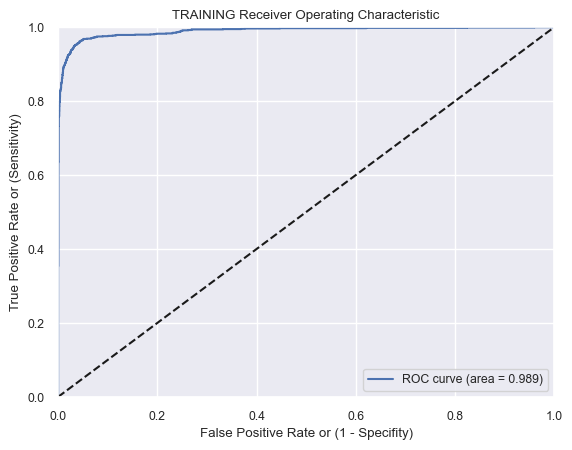



TESTING METRICS

    Test Confusion Matrix:
    [[1207   18]
 [  23  377]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.98      0.99      0.98      1225
           1       0.95      0.94      0.95       400

    accuracy                           0.97      1625
   macro avg       0.97      0.96      0.97      1625
weighted avg       0.97      0.97      0.97      1625

    



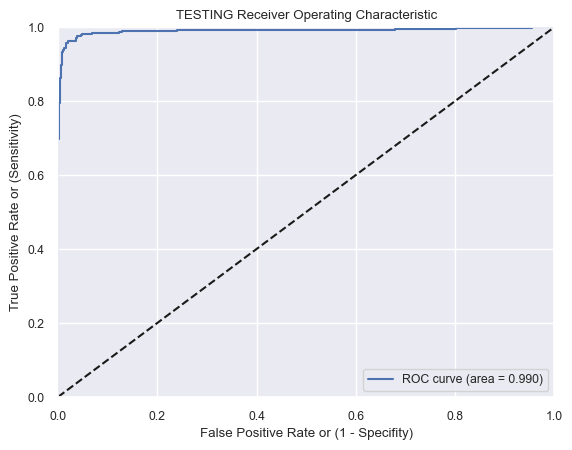

In [37]:
doClassification_NN(nn2, X_train, X_test, y_train, y_test)

In [38]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate / (1 - Specifity)')
    plt.ylabel('True Positive Rate / (Sensitivity)')
    plt.title('Testing Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix:
    [[3672    1]
 [   0 1199]]

    Train Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      3673
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

    



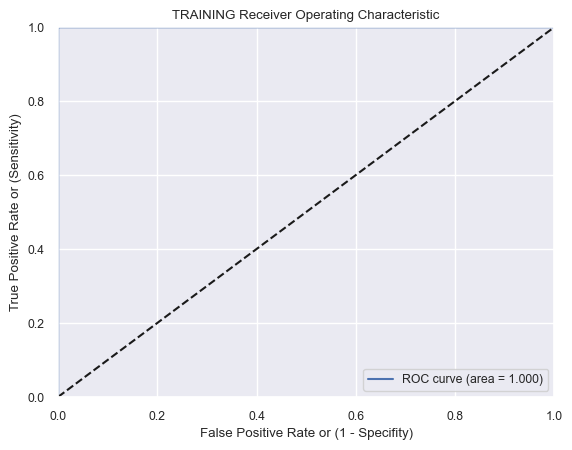



TESTING METRICS

    Test Confusion Matrix:
    [[1223    2]
 [   1  399]]

    Test Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

    



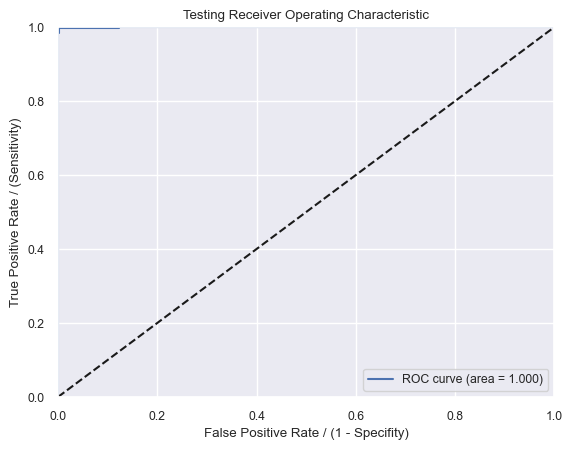

In [39]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train, y_train)

doClassification(xgb, X_train, X_test, y_train, y_test)

In [40]:
df_combined2.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [41]:
df_combined3 = df_combined2.copy()
df_combined3["quality"] = df_combined2['quality']

# Choose cutoff value and create list of names to replace
names_replaced = list(df_combined3['quality'].value_counts().loc[df_combined3['quality'].value_counts() < 7].index)

# Replace in dataframe
for cls in names_replaced:
    df_combined3['quality'] = df_combined3['quality'].replace(cls,"Other")

# Check binning
df_combined3['quality'].value_counts()

quality
6        2836
5        2138
7        1079
4         216
8         193
3          30
Other       5
Name: count, dtype: int64

In [42]:
df_combined3 = pd.get_dummies(df_combined3)

# Split preprocessed data into features and target arrays
X = df_combined3.drop("wine_type", axis=1)
y = df_combined3.wine_type

# Split preprocessed data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

# StandardScaler
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(4872, 18)
(1625, 18)


In [43]:
# Define model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn3 = tf.keras.models.Sequential()

# Add first Dense layer
nn3.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Second layer
nn3.add(tf.keras.layers.Dense(units=7, activation="relu"))

nn3.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the Sequential model
nn3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 15)             │           285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile Sequential model and customized metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn3.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7980 - loss: 0.5303
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9845 - loss: 0.1120
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9912 - loss: 0.0498
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9940 - loss: 0.0336
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9949 - loss: 0.0220
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9964 - loss: 0.0250
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9942 - loss: 0.0319
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9972 - loss: 0.0146
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9961 - loss: 0.0192
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.9974 - loss: 0.0170
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9956 - loss: 0.0245
Epoch 12/20
153/153 ━━━━━━━━━━

In [45]:
# Evaluate model with test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0303
Loss: 0.030320482328534126, Accuracy: 0.9944615364074707


153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
TRAINING METRICS

    Train Confusion Matrix:
    [[3706    1]
 [  10 1155]]

    Train Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      3707
           1       1.00      0.99      1.00      1165

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

    



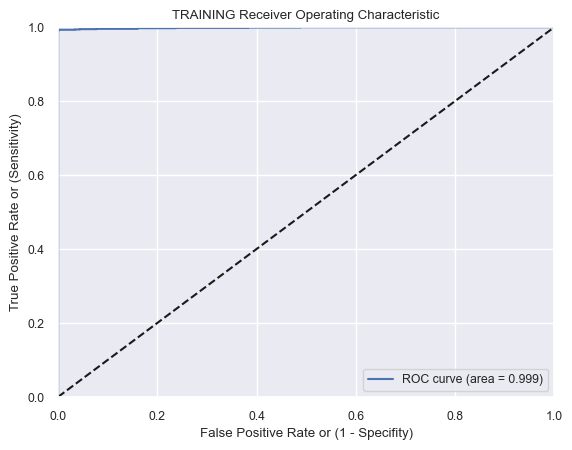



TESTING METRICS

    Test Confusion Matrix:
    [[1187    4]
 [   5  429]]

    Test Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1191
           1       0.99      0.99      0.99       434

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

    



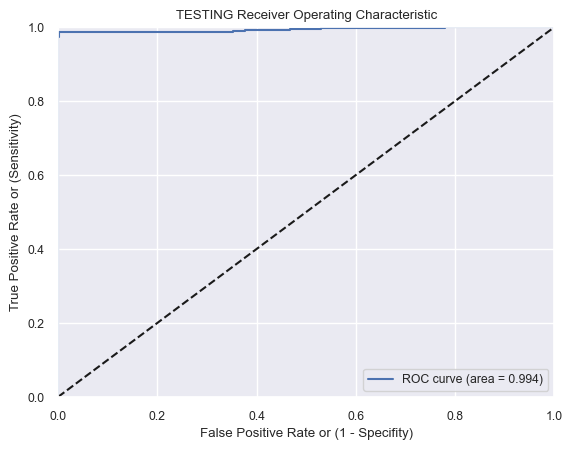

In [46]:
doClassification_NN(nn3, X_train_scaled, X_test_scaled, y_train, y_test)